<a href="https://colab.research.google.com/github/BrandonCarp/LinReg/blob/main/myLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #data frame = data manipulation/analysis. Usage : pd.DataFrame() creates a spreadsheet like table

In [ ]:
import numpy as np #numerical computing, used here for generating random numbers

In [ ]:
import seaborn as sns #grapphing/statistical data visualization, better looking charts than plain matplotlib

In [ ]:
import matplotlib.pyplot as plt #graphing/basic plotting library Usage: plt.show() displays charts; plt.plot() makes line plots.

In [ ]:
from sklearn.linear_model import LinearRegression #linear model Usage: LinearRegression().fit(X, y) trains a model to predict a target.

In [ ]:
np.random.seed(42) #  setting a seed is to make your random number generation predictable and repeatable. 42#hitchhikers guide

num_samples = 500 #how many people (or data rows) we are simulating

Years_of_Experience = np.random.randint(2, 21, size=num_samples) # array of 500 integers, each randomly chosen from 2-20 years of exp (2, 21)

slope = (200_000 - 60_000) / 18 # definesa linear relationship with intercept.
intercept = 60_000

salary = slope * Years_of_Experience + intercept + np.random.normal(0, 10_000, size=num_samples) #you're generating the Salary column.
# np.random.normal(0, 10_000, size=500) adds random fluctuations.
data = {'Years_of_Experience': Years_of_Experience, 'Salary': salary}
df = pd.DataFrame(data)

In [ ]:
df.describe()

,Years_of_Experience,Salary
count,500.000000,500.000000
mean,10.616000,142570.011096
std,5.662922,44935.263058
min,2.000000,54881.134555
25%,5.750000,104426.300731
50%,10.000000,139865.032545
75%,16.000000,182341.125962
max,20.000000,241879.376204


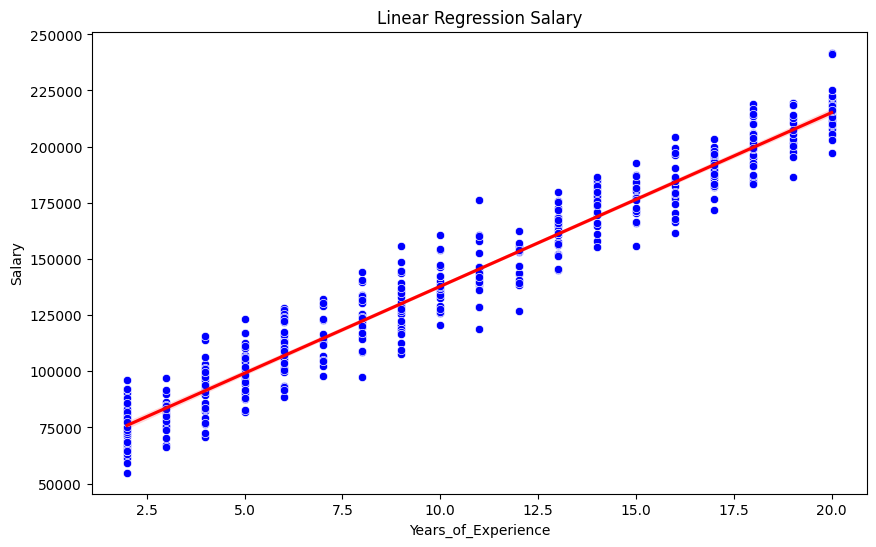

In [ ]:
plt.figure(figsize=(10, 6)) # width 10" , height 6"
sns.scatterplot(x='Years_of_Experience', y='Salary', data=df, color='blue')
sns.regplot(x='Years_of_Experience', y='Salary', data=df, scatter=False, color='red')

plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Salary')

plt.show()

In [ ]:
X = df[['Years_of_Experience']]

In [ ]:
y = df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.9488372177019488

In [ ]:
lr.score(X_test, y_test)

0.9573704756930141

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

7905.114728709239

In [ ]:
mean_squared_error(y_test, y_pred)

93933277.37947103

In [ ]:
r2_score(y_test, y_pred)

0.9573704756930141

In [ ]:
lr.coef_ #every year they go up about $7696

array([7696.61292305])

In [ ]:
lr.intercept_ # 0 years xp is about $60k

np.float64(60961.340880280564)

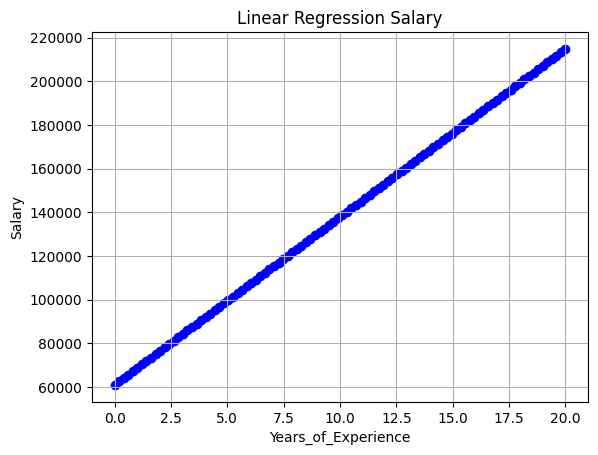

In [ ]:
coefficients = lr.coef_
intercept = lr.intercept_

X = np.linspace(0, 20, 100)
y = coefficients*X + intercept

plt.scatter(X, y, label=f'y = {coefficients[0]}x + {intercept}', color='blue')

plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Salary')

plt.grid()
plt.show()